With the courtesy of:
1- http://cs231n.stanford.edu/ 

In [2]:
import os
import keras
from keras.preprocessing import image
from keras.applications.imagenet_utils import decode_predictions, preprocess_input
from keras.models import Model

Using TensorFlow backend.


In [3]:
model = keras.applications.VGG16(weights='imagenet', include_top=True)

In [4]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
__________

In [5]:
!ls foldered_test

1368  15  17  20  21  24  25  28  311  324  43	52  668  70  727


In [6]:
import numpy as np
import matplotlib.pyplot as plt

def load_image(path):
    img = image.load_img(path, target_size=model.input_shape[1:3])
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)
    return img, x

Preprocessing includes:
<br>1) Mean subtraction
<br>2) Normalization

<img src='prepro.jpeg'>

shape of x:  (1, 224, 224, 3)
data type:  float32


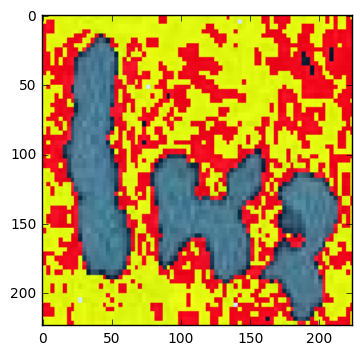

In [7]:
img, x = load_image("foldered_test/15/15_53.png")
print("shape of x: ", x.shape)
print("data type: ", x.dtype)
plt.imshow(x[0,:,:,:])
plt.show()

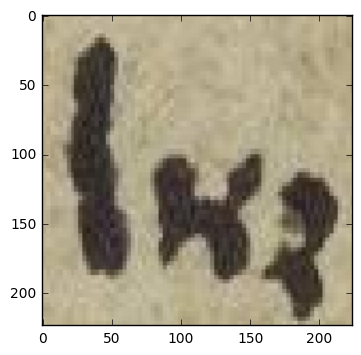

In [8]:
plt.imshow(img)
plt.show()

In [9]:
feat_extractor = Model(inputs=model.input, outputs=model.get_layer('fc1').output)
feat_extractor.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
__________

(1, 4096)


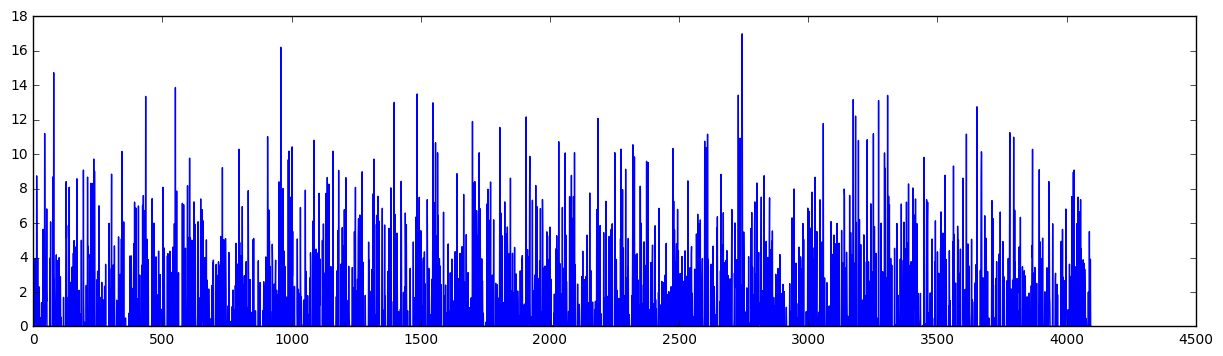

In [10]:
img, x = load_image("foldered_test/15/15_53.png")
feat = feat_extractor.predict(x)
print(feat.shape)
plt.figure(figsize=(15,4))
plt.plot(feat[0])
plt.show()

In [11]:
images_path = 'foldered_test'
image_extensions = ['.jpg', '.png', '.jpeg']

image_paths = [os.path.join(dp, f) for dp, dn, filenames in os.walk(images_path) for f in filenames if os.path.splitext(f)[1].lower() in image_extensions]

print("There are %d images to analyze" % len(image_paths))

There are 169 images to analyze


In [12]:
image_paths

['foldered_test/17/17_40.png',
 'foldered_test/17/17_34.png',
 'foldered_test/17/17_37.png',
 'foldered_test/17/17_33.png',
 'foldered_test/17/17_35.png',
 'foldered_test/17/17_36.png',
 'foldered_test/17/17_38.png',
 'foldered_test/17/17_39.png',
 'foldered_test/668/668_15.png',
 'foldered_test/668/668_17.png',
 'foldered_test/668/668_16.png',
 'foldered_test/668/668_14.png',
 'foldered_test/668/668_18.png',
 'foldered_test/28/28_60.png',
 'foldered_test/28/28_52.png',
 'foldered_test/28/28_53.png',
 'foldered_test/28/28_58.png',
 'foldered_test/28/28_62.png',
 'foldered_test/28/28_64.png',
 'foldered_test/28/28_56.png',
 'foldered_test/28/28_59.png',
 'foldered_test/28/28_63.png',
 'foldered_test/28/28_54.png',
 'foldered_test/28/28_61.png',
 'foldered_test/28/28_57.png',
 'foldered_test/28/28_55.png',
 'foldered_test/15/15_60.png',
 'foldered_test/15/15_64.png',
 'foldered_test/15/15_67.png',
 'foldered_test/15/15_56.png',
 'foldered_test/15/15_65.png',
 'foldered_test/15/15_62.png'

In [13]:
labels=[int(p.split('/')[1]) for p in image_paths]


In [14]:
labels

[17,
 17,
 17,
 17,
 17,
 17,
 17,
 17,
 668,
 668,
 668,
 668,
 668,
 28,
 28,
 28,
 28,
 28,
 28,
 28,
 28,
 28,
 28,
 28,
 28,
 28,
 15,
 15,
 15,
 15,
 15,
 15,
 15,
 15,
 15,
 15,
 15,
 15,
 15,
 15,
 15,
 15,
 15,
 15,
 25,
 25,
 25,
 25,
 25,
 25,
 25,
 25,
 25,
 25,
 25,
 25,
 25,
 25,
 52,
 52,
 52,
 52,
 52,
 52,
 52,
 52,
 52,
 52,
 311,
 311,
 311,
 311,
 311,
 311,
 311,
 311,
 311,
 311,
 311,
 311,
 70,
 70,
 70,
 70,
 70,
 70,
 70,
 70,
 70,
 70,
 70,
 70,
 43,
 43,
 43,
 43,
 43,
 43,
 43,
 43,
 43,
 43,
 1368,
 1368,
 1368,
 1368,
 1368,
 1368,
 1368,
 1368,
 20,
 20,
 20,
 20,
 20,
 727,
 727,
 727,
 727,
 24,
 24,
 24,
 24,
 24,
 24,
 24,
 24,
 24,
 24,
 24,
 24,
 24,
 24,
 24,
 24,
 24,
 24,
 24,
 24,
 24,
 24,
 24,
 24,
 21,
 21,
 21,
 21,
 21,
 21,
 21,
 21,
 21,
 21,
 21,
 21,
 21,
 21,
 21,
 21,
 21,
 324,
 324,
 324,
 324,
 324,
 324,
 324,
 324,
 324]

In [15]:
features = []
for i, image_path in enumerate(image_paths):
    img, x = load_image(image_path);
    feat = feat_extractor.predict(x)[0]
    features.append(feat)

print('finished extracting features for %d images' % len(image_paths))

finished extracting features for 169 images


In [16]:
len(features[0])

4096

In [17]:
from sklearn.decomposition import PCA

features = np.array(features)
pca = PCA(n_components=100)
pca.fit(features)

PCA(copy=True, n_components=100, whiten=False)

In [18]:
pca_features = pca.transform(features)

In [19]:
pca_features.shape

(169, 100)

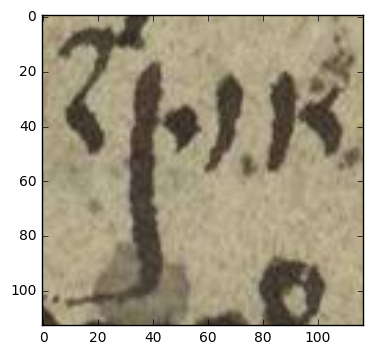

In [20]:
import random

# Select a random word image
query_image_idx = int(len(image_paths) * random.random())
img = image.load_img(image_paths[query_image_idx])
plt.imshow(img)
plt.show()

In [21]:
query_image_idx

164

In [22]:
from scipy.spatial import distance

similar_idx = [ distance.cosine(pca_features[query_image_idx], feat) for feat in pca_features ]

In [23]:
similar_idx[query_image_idx]

-1.5624113336443202e-08

In [24]:
idx_closest = sorted(range(len(similar_idx)), key=lambda k: similar_idx[k])[1:6]

In [25]:
idx_closest

[162, 168, 160, 13, 161]

In [26]:

def get_closest_images(query_image_idx, num_results=5):
    distances = [ distance.cosine(pca_features[query_image_idx], feat) for feat in pca_features ]
    idx_closest = sorted(range(len(distances)), key=lambda k: distances[k])[1:num_results+1]
    return idx_closest

def get_concatenated_images(indexes, thumb_height):
    thumbs = []
    for idx in indexes:
        img = image.load_img(image_paths[idx])
        img = img.resize((int(img.width * thumb_height / img.height), thumb_height))
        thumbs.append(img)
    concat_image = np.concatenate([np.asarray(t) for t in thumbs], axis=1)
    return concat_image

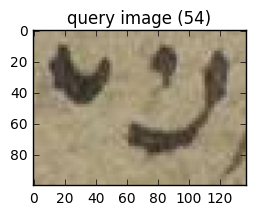

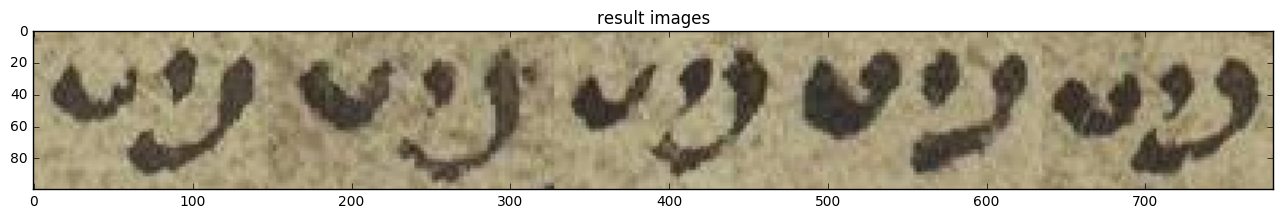

In [27]:

# spot a query word image
query_image_idx = int(len(image_paths) * random.random())
idx_closest = get_closest_images(query_image_idx)
query_image = get_concatenated_images([query_image_idx], 100)
results_image = get_concatenated_images(idx_closest, 100)

# display query word image
plt.figure(figsize = (3,2))
plt.imshow(query_image)
plt.title("query image (%d)" % query_image_idx)

# display returned word images
plt.figure(figsize = (16,12))
plt.imshow(results_image)
plt.title("result images")
plt.show()

In [28]:
%matplotlib inline
import os
import random
import numpy as np
import json
import matplotlib.pyplot
import pickle
from matplotlib.pyplot import imshow
from PIL import Image
from sklearn.manifold import TSNE

In [29]:
num_images_to_plot = 100

if len(image_paths) > num_images_to_plot:
    sort_order = sorted(random.sample(range(len(image_paths)), num_images_to_plot))
    image_paths = [image_paths[i] for i in sort_order]
    labels = [labels[i] for i in sort_order]
    pca_features = [pca_features[i] for i in sort_order]

In [30]:
X = np.array(pca_features)
tsne = TSNE(n_components=2, learning_rate=150, perplexity=30, angle=0.2, verbose=2).fit_transform(X)

[t-SNE] Computing pairwise distances...
[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Computed conditional probabilities for sample 100 / 100
[t-SNE] Mean sigma: 45.037545
[t-SNE] Iteration 25: error = 0.2399902, gradient norm = 0.0189877
[t-SNE] Iteration 50: error = 0.2891061, gradient norm = 0.0291734
[t-SNE] Iteration 75: error = 0.2205000, gradient norm = 0.0098850
[t-SNE] Iteration 100: error = 0.2192065, gradient norm = 0.0090369
[t-SNE] Error after 100 iterations with early exaggeration: 0.219206
[t-SNE] Iteration 125: error = 0.2397402, gradient norm = 0.0109408
[t-SNE] Iteration 150: error = 0.2315505, gradient norm = 0.0179700
[t-SNE] Iteration 175: error = 0.2311338, gradient norm = 0.0095518
[t-SNE] Iteration 200: error = 0.2428395, gradient norm = 0.0138257
[t-SNE] Iteration 225: error = 0.2660649, gradient norm = 0.0189307
[t-SNE] Iteration 225: did not make any progress during the last 30 episodes. Finished.
[t-SNE] Error after 225 iterations: 0.266065


In [31]:
tx, ty = tsne[:,0], tsne[:,1]
tx = (tx-np.min(tx)) / (np.max(tx) - np.min(tx))
ty = (ty-np.min(ty)) / (np.max(ty) - np.min(ty))

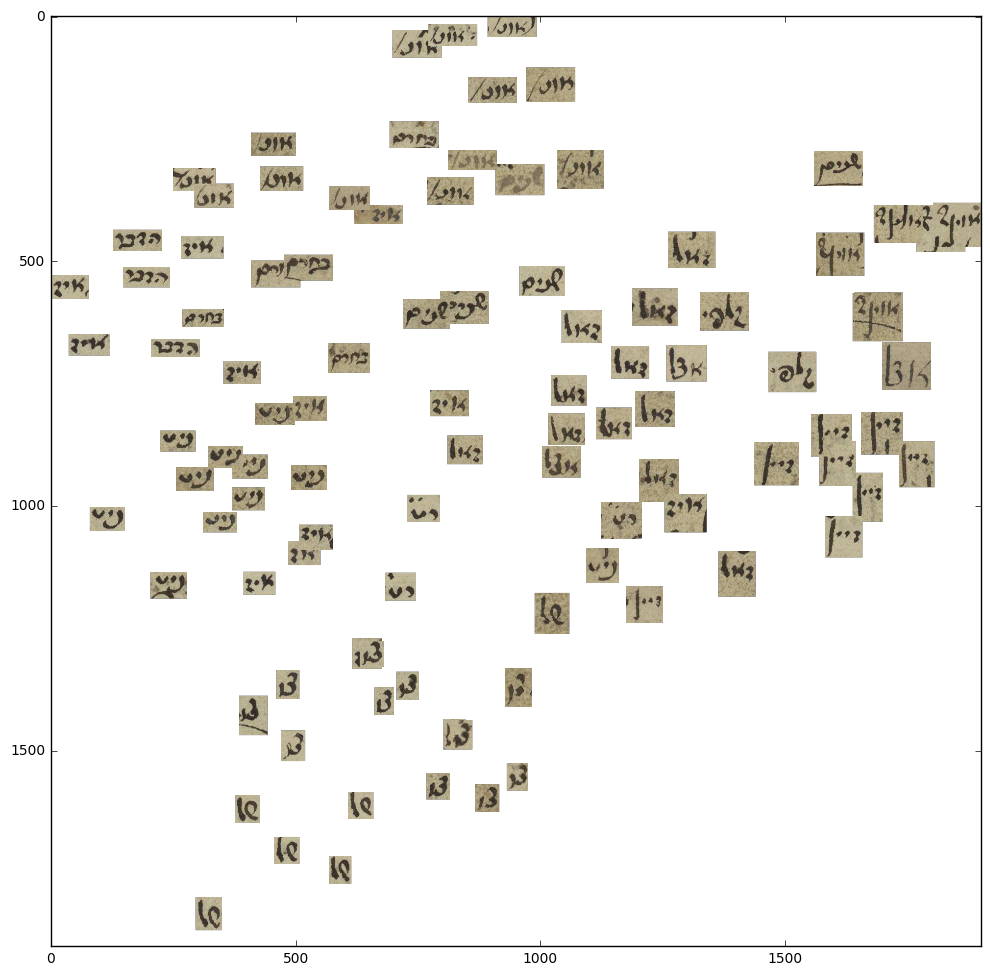

In [32]:
width = 1900
height = 1900
max_dim=100

full_image = Image.new('RGBA', (width, height))
for img, x, y in zip(image_paths, tx, ty):
    tile = Image.open(img)
    rs = max(1, tile.width/max_dim, tile.height/max_dim)
    tile = tile.resize((int(tile.width/rs), int(tile.height/rs)), Image.ANTIALIAS)
    full_image.paste(tile, (int((width-max_dim)*x), int((height-max_dim)*y)), mask=tile.convert('RGBA'))

matplotlib.pyplot.figure(figsize = (16,12))
imshow(full_image)

In [33]:
full_image.save("tSNE_pinkas.png")

In [34]:
import rasterfairy
nx = 10
ny = 10
grid_assignment = rasterfairy.transformPointCloud2D(tsne, target=(nx, ny))

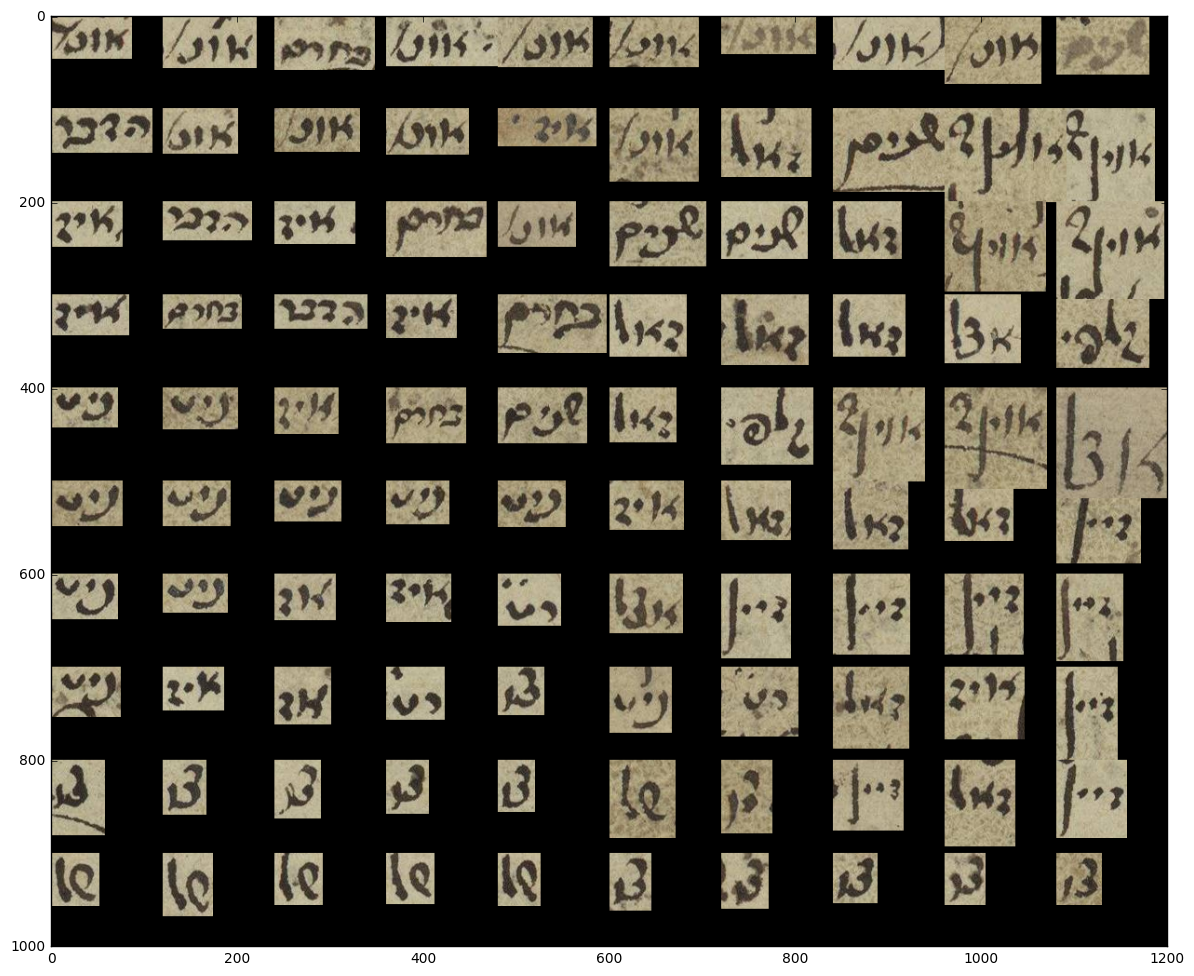

In [35]:
tile_width = 120
tile_height = 100

full_width = tile_width * nx
full_height = tile_height * ny
aspect_ratio = float(tile_width) / tile_height

grid_image = Image.new('RGB', (full_width, full_height))

for img, grid_pos in zip(image_paths, grid_assignment[0]):
    idx_x, idx_y = grid_pos
    x, y = tile_width * idx_x, tile_height * idx_y
    tile = Image.open(img)
    tile_ar = float(tile.width) / tile.height  
    grid_image.paste(tile, (int(x), int(y)))

matplotlib.pyplot.figure(figsize = (16,12))
imshow(grid_image)

In [36]:
grid_image.save("tSNE_grid_pinkas.jpg")